# 06: Exploring Probability Distributions for Health Demand Modelling

---

## 1. Introduction

**What is a probability distribution?**

A probability distribution is a mathematical function that describes the likelihood of different possible outcomes for an experiment or a random variable. In data science and statistics, it's the cornerstone of modelling because it provides a theoretical framework for understanding the structure of our data.

**Project Goal & The Role of Distributions**

This project aims to model the demand for medical procedures (MRI, CT, Endoscopy) across different geographical areas and demographic groups, specifically using ONS 5-year age bands. Understanding the underlying probability distribution of our data is crucial for several reasons:

1.  **Model Selection:** The nature of our target variable (e.g., is it a count, a proportion, or a continuous measurement?) dictates the type of statistical model we should use. Choosing a model that matches our data's distribution (e.g., Poisson Regression for counts) leads to more accurate and reliable results.
2.  **Inference & Simulation:** A well-fitted distribution allows us to make statistical inferences. We can estimate the average demand, quantify our uncertainty with confidence intervals, and simulate future scenarios (e.g., "What happens if the population in an area increases by 10%?").
3.  **Feature Engineering:** Understanding distributions helps us decide when and how to transform our data to meet the assumptions of certain machine learning algorithms.

## 2. Distributions for Count Data

Count data involves non-negative integers (0, 1, 2, ...). In our project, the absolute number of procedures performed for an age group is count data. These discrete distributions are the natural candidates for modelling it.

### The Poisson Distribution

The Poisson distribution is the classic choice for modelling the number of times an event occurs within a fixed interval of time or space, given we know the average rate of occurrence and each event is independent.

**Key Properties:**
- **Parameter:** The rate parameter, $\lambda$ (lambda), which is the mean number of events in the interval.
- **Mean:** $E[X] = \lambda$
- **Variance:** $Var(X) = \lambda$
- **Probability Mass Function (PMF):** The probability of observing exactly $k$ events is given by:
$$ P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} $$ 

**Application to Health Demand:**
- **Direct Link:** This is a natural first choice for modelling the **number of CT scans** required by a specific age group (e.g., 50-54 year olds) in a particular geographic area (e.g., an LSOA) over a fixed time period (e.g., one month).
- **Parameter Interpretation:** In this context, $\lambda$ would represent the average number of CT scans we'd expect for that demographic group in that area and time.
- **Spatial ML Relevance:** In a spatial model, we could aim to predict a unique $\lambda$ for each LSOA based on its demographic makeup, deprivation index, and proximity to a hospital. A key limitation is its assumption that the mean equals the variance. If the variance in the data is much larger than the mean (a common situation called 'overdispersion'), the Poisson model may not be the best fit.

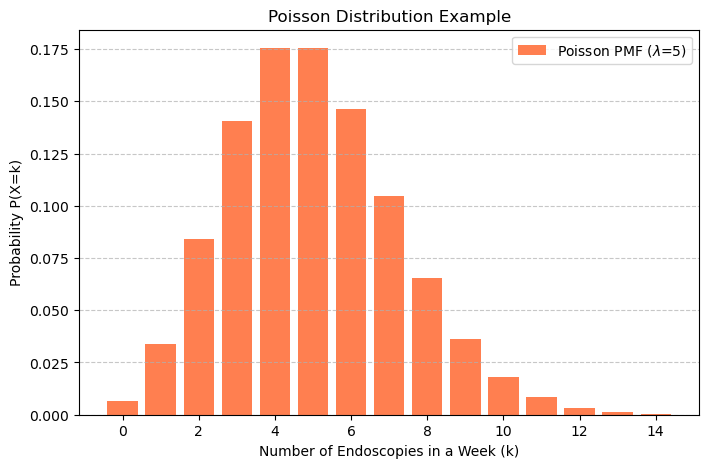

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Let's visualize a Poisson distribution
# Say the average number of endoscopies for the 70-74 age band in a region per week is 5
lambda_val = 5
k_values = np.arange(0, 15)
pmf_values = poisson.pmf(k_values, lambda_val)

plt.figure(figsize=(8, 5))
plt.bar(k_values, pmf_values, color='coral', label=f'Poisson PMF ($\lambda$={lambda_val})')
plt.title('Poisson Distribution Example')
plt.xlabel('Number of Endoscopies in a Week (k)')
plt.ylabel('Probability P(X=k)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### The Binomial Distribution

The Binomial distribution models the number of 'successes' in a fixed number of independent trials, where each trial has the same probability of success.

**Key Properties:**
- **Parameters:** 
    - $n$: The total number of trials.
    - $p$: The probability of success on a single trial.
- **Mean:** $E[X] = np$
- **Variance:** $Var(X) = np(1-p)$

**Application to Health Demand:**
- **Direct Link:** If we consider the entire population of a specific age band (e.g., the 337,298 people in the 65-69 age band) as $n$ trials, and we know the probability $p$ that any single person in that group needs an MRI, the Binomial distribution could model the total number of people who will need one.
- **Relationship to Poisson:** When $n$ is very large and $p$ is very small, the Binomial distribution can be approximated by a Poisson distribution where $\lambda = np$. Given the large population sizes and relatively small procedure rates, this connection is highly relevant to our dataset.

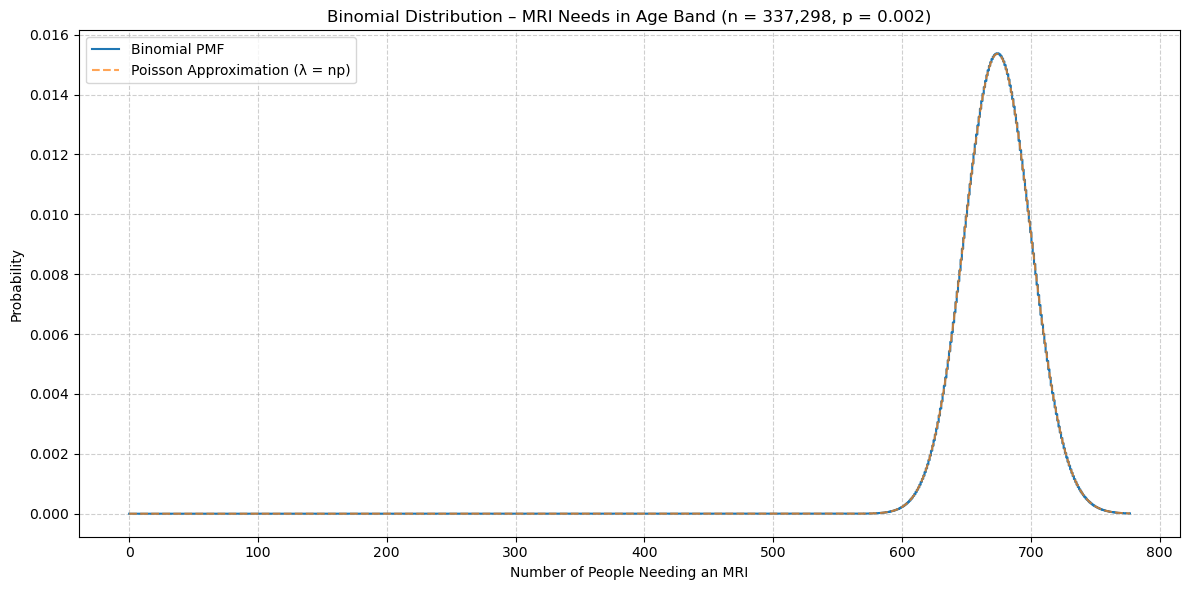

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# Parameters
n = 337_298  # total number of people in age band (65–69)
p = 0.002    # estimated probability that one person needs an MRI
mu = n * p   # expected value (also λ for Poisson approximation)

# Define x range for plotting
x = np.arange(0, int(mu + 4*np.sqrt(mu)))  # range covering ~99.99% of mass

# Binomial PMF
binom_pmf = binom.pmf(x, n, p)

# Poisson approximation for comparison
poisson_pmf = poisson.pmf(x, mu)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, binom_pmf, label='Binomial PMF', drawstyle='steps-mid')
plt.plot(x, poisson_pmf, '--', label='Poisson Approximation (λ = np)', alpha=0.7)
plt.title('Binomial Distribution – MRI Needs in Age Band (n = 337,298, p = 0.002)')
plt.xlabel('Number of People Needing an MRI')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 3. Distributions for Continuous Variables

Continuous distributions model variables that can take any value within a given range. Examples in our project include procedure *rates*, waiting *times*, or age (as a continuous measure).

### The Exponential Distribution

The Exponential distribution models the time *between* events in a process where events happen at a constant average rate (a Poisson process).

**Key Properties:**
- **Parameter:** The rate parameter, $\lambda$.
- **Mean:** $E[X] = \frac{1}{\lambda}$ (The average time *until* the next event)
- **Variance:** $Var(X) = \frac{1}{\lambda^2}$

**Application to Health Demand:**
- **Direct Link:** This is perfect for modelling waiting times. For example, if a hospital's endoscopy unit receives patients at an average rate of $\lambda=2$ patients per hour, the Exponential distribution could model the time between patient arrivals. It's also widely used in survival analysis to model the time until an event occurs, like equipment failure or disease remission.

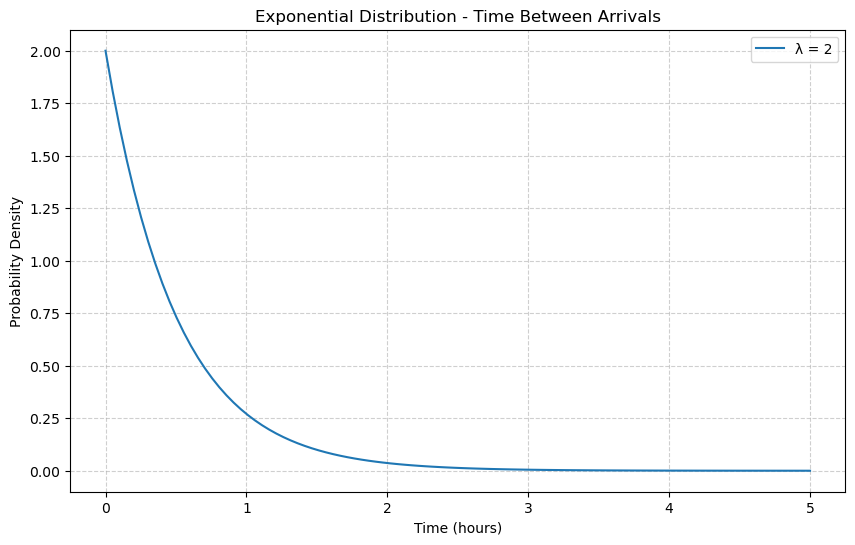

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
rate = 2  # patients per hour
scale = 1 / rate  # mean time between arrivals

# Generate x values
x = np.linspace(0, 5, 100)

# Plot the Exponential PDF
plt.figure(figsize=(10, 6))
plt.plot(x, expon.pdf(x, scale=scale), label=f'λ = {rate}')
plt.title('Exponential Distribution - Time Between Arrivals')
plt.xlabel('Time (hours)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


### The Normal (Gaussian) Distribution

The Normal distribution is the famous 'bell curve'. It's symmetric and is defined by its mean and standard deviation. The Central Limit Theorem states that the sum (or average) of many independent random variables tends towards a normal distribution, regardless of the original distribution, making it ubiquitous in nature and statistics.

**Key Properties:**
- **Parameters:**
    - $\mu$: The mean.
    - $\sigma^2$: The variance.
- **Mean:** $E[X] = \mu$
- **Variance:** $Var(X) = \sigma^2$

**Application to Health Demand:**
- **Direct Link:** While raw procedure *counts* are unlikely to be normally distributed, the *rates* might be, or they can often be transformed to become approximately normal (e.g., using a log transform). More commonly, the Normal distribution is used to model the *errors* (residuals) of a regression model. Many standard statistical models (like Linear Regression) formally assume that these errors are normally distributed.

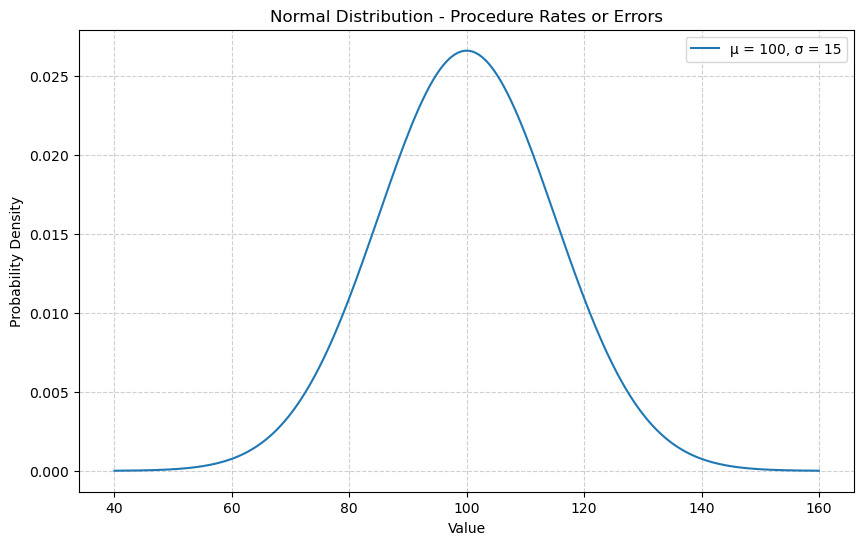

In [5]:
from scipy.stats import norm

# Parameters
mu = 100  # mean number of procedures per month
sigma = 15  # standard deviation

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 200)

plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, mu, sigma), label=f'μ = {mu}, σ = {sigma}')
plt.title('Normal Distribution - Procedure Rates or Errors')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


## 4. Distributions for Proportions and Probabilities

This category is vital for modelling prevalence, rates, and any variable that is constrained to be between 0 and 1.

### The Beta Distribution

The Beta distribution is an incredibly flexible distribution for modelling random variables that are restricted to the interval [0, 1]. This makes it the perfect candidate for modelling proportions, percentages, and probabilities.

**Key Properties:**
- **Parameters:** The shape parameters, $\alpha > 0$ and $\beta > 0$.
- **Mean:** $E[X] = \frac{\alpha}{\alpha + \beta}$
- **Variance:** $Var(X) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

**Application to Health Demand:**
- **Direct Link:** This is the ideal distribution for modelling disease prevalence or the **proportion** of people in an age band who will require a specific procedure. The `Endoscopy (procedure) rate / 1,000` from our data, once divided by 1,000 to become a true proportion (a value between 0 and 1), could be modelled with a Beta distribution.
- **Parameter Interpretation:** The $\alpha$ and $\beta$ parameters (the 'shape' parameters) would allow us to model our belief about this proportion. For example, a high $\alpha$ and low $\beta$ would mean we believe the proportion is likely to be high.

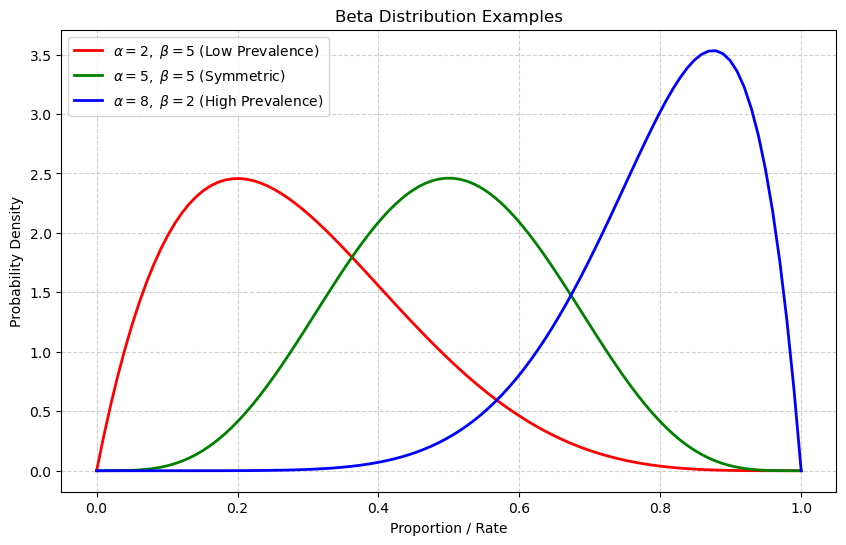

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define x range
x = np.linspace(0, 1, 100)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot beta distributions with corrected labels
ax.plot(x, beta.pdf(x, 2, 5), 'r-', lw=2, label=r'$\alpha=2,\ \beta=5$ (Low Prevalence)')
ax.plot(x, beta.pdf(x, 5, 5), 'g-', lw=2, label=r'$\alpha=5,\ \beta=5$ (Symmetric)')
ax.plot(x, beta.pdf(x, 8, 2), 'b-', lw=2, label=r'$\alpha=8,\ \beta=2$ (High Prevalence)')

# Set title and labels
ax.set_title('Beta Distribution Examples')
ax.set_xlabel('Proportion / Rate')
ax.set_ylabel('Probability Density')

# Show legend and grid
ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 5. Summary and Forward Look

This notebook provides the theoretical toolkit for our project. We've seen that different types of data naturally align with different families of distributions.

| Distribution | Type | Models... | Primary Health Demand Application |
|:---|:---|:---|:---|
| **Poisson** | Discrete | Counts of events in a fixed interval | Absolute number of procedures per age band per month. |
| **Binomial** | Discrete | Number of 'successes' in $n$ trials | Number of people in a population needing a scan. |
| **Exponential**| Continuous | Time between events | Waiting time for an appointment; time-to-failure for equipment. |
| **Normal** | Continuous | Symmetric, bell-shaped data | Distribution of model errors; transformed rate data. |
| **Beta** | Continuous | Values between [0, 1] | Prevalence rates; procedure rates (scaled to a proportion). |

In the next notebook, `07_analysis_and_fitting_of_health_procedure_data.ipynb`, we will leave the world of theory and move into practice. We will use the real health procedure data to see which of these theoretical models best fits reality and explore the critical data transformation steps required for robust modelling.